In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [4]:
car_data = pd.read_csv('carprice.csv')
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
car_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [8]:
car_data.shape

(4340, 8)

In [9]:
car_data.isnull().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [10]:
print(car_data.fuel.value_counts())
print(car_data.seller_type.value_counts())
print(car_data.transmission.value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [11]:
car_data.replace({"fuel": {"Diesel":0, "Petrol":1, "CNG":2, "LPG":3, "Electric":4}},inplace=True)
car_data.replace({"seller_type": {"Individual":0, "Dealer":1, "Trustmark Dealer":2}},inplace=True)
car_data.replace({"transmission": {"Manual":0, "Automatic":1}},inplace=True)

C:\Users\conne\AppData\Local\Temp\ipykernel_17824\1136987227.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({"fuel": {"Diesel":0, "Petrol":1, "CNG":2, "LPG":3, "Electric":4}},inplace=True)
C:\Users\conne\AppData\Local\Temp\ipykernel_17824\1136987227.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({"seller_type": {"Individual":0, "Dealer":1, "Trustmark Dealer":2}},inplace=True)
C:\Users\conne\AppData\Local\Temp\ipykernel_17824\1136987227.py:3: FutureWarning: Downcasting behavior in `replac

In [13]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,Second Owner


In [15]:
print(car_data.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [16]:
car_data.replace({"owner": {"Test Drive Car":0, "First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4}},inplace=True)

C:\Users\conne\AppData\Local\Temp\ipykernel_17824\167188174.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({"owner": {"Test Drive Car":0, "First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4}},inplace=True)


In [17]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,1
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,2


In [19]:
X = car_data.drop(['name','selling_price'],axis=1)
Y = car_data['selling_price']

In [21]:
print(X)


      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      1
1     2007      50000     1            0             0      1
2     2012     100000     0            0             0      1
3     2017      46000     1            0             0      1
4     2014     141000     0            0             0      2
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      2
4336  2014      80000     0            0             0      2
4337  2009      83000     1            0             0      2
4338  2016      90000     0            0             0      1
4339  2016      40000     1            0             0      1

[4340 rows x 6 columns]


In [23]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [27]:
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [31]:
train_data_pred = lin_reg.predict(X_train)
# R squared Error
error_score = metrics.r2_score(Y_train, train_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.44326878609609766


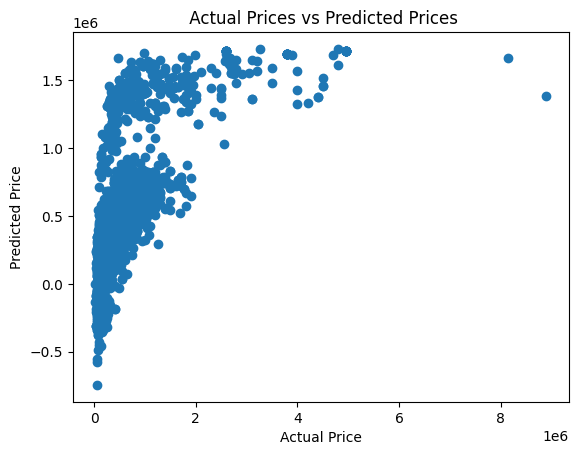

In [32]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [34]:
test_data_pred = lin_reg.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R squared Error : ", error_score)

R squared Error :  0.5219097394754679


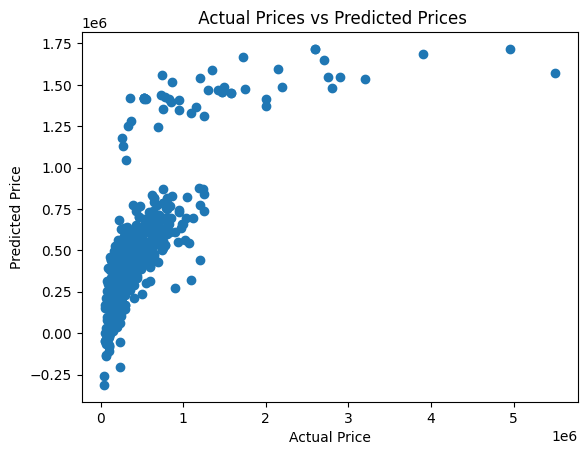

In [35]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [37]:
lasso_reg = Lasso()
lasso_reg.fit(X_train,Y_train)

Lasso()

In [39]:
train_data_prediction = lasso_reg.predict(X_train)
error_score = metrics.r2_score(Y_train,train_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.44326878604387243


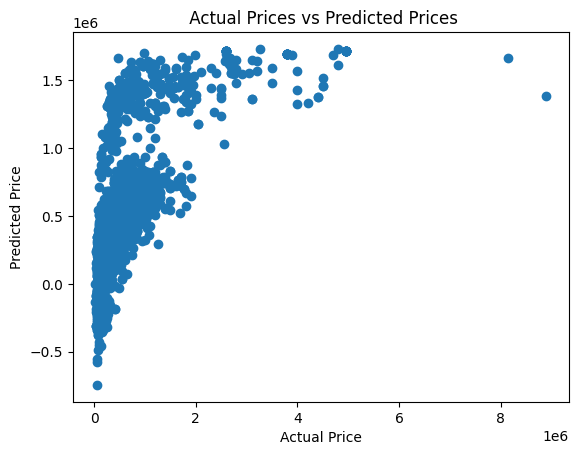

In [41]:
plt.scatter(Y_train, train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [43]:
test_data_prediction = lasso_reg.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5219089629563558


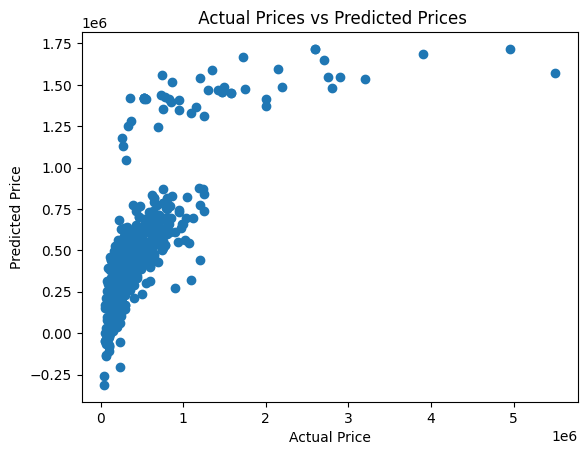

In [45]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [47]:
import joblib

# Assuming you have trained a model, e.g., lin_reg
joblib.dump(lin_reg, 'model.pkl')

print("Model saved as model.pkl")

Model saved as model.pkl
